In [217]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
import warnings 

warnings.filterwarnings('ignore')

In [218]:
df = pd.read_csv('../DataCleaning/merged.csv')

In [219]:
df.head(5)

,Order ID,Order Item ID,Order YearMonth,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Date,date,Year Month,Warehouse Inventory,Inventory Cost Per Unit
0,1,4381,202101,1,2:48,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,7399,...,Same Day,3,200,0.09,100,2021-01-01 02:48:00,2021-01-01,202101,132,2.03202
1,2,29,202101,1,3:30,1,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,918,...,Standard Class,4,60,0.2,147,2021-01-01 03:30:00,2021-01-01,202101,254,0.49486
2,3,32,202101,1,3:30,4,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,918,...,Standard Class,4,400,0.06,245,2021-01-01 03:30:00,2021-01-01,202101,18,2.25689
3,4,33,202101,1,3:30,5,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,918,...,Standard Class,4,250,0.09,125,2021-01-01 03:30:00,2021-01-01,202101,442,2.34227
4,5,109801,202101,1,4:12,5,Footwear,Electronics,Under Armour Women's Ignite Slide,6124,...,Standard Class,4,160,0.15,75,2021-01-01 04:12:00,2021-01-01,202101,18,2.23827


In [220]:
# Convert to datetime (first day of the month)
df['date'] = pd.to_datetime(df['date'])

In [221]:
# Convert to numeric, forcing errors to NaN
df['Discount %'] = pd.to_numeric(df['Discount %'], errors='coerce')

In [222]:
df['Shipment Mode'].unique()

array(['Same Day', 'Standard Class', 'First Class', 'Second Class'],
      dtype=object)

In [223]:
df['Warehouse Country'].unique()

array(['USA', 'Puerto Rico'], dtype=object)

In [224]:
df['Product Department'].unique().tolist()

['Fan Shop',
 'Apparel',
 'Footwear',
 'Outdoors',
 'Golf',
 'Fitness',
 'Technology',
 'Book Shop',
 'Discs Shop',
 'Health and Beauty',
 'Pet Shop']

In [225]:
df['Product Category'].unique().tolist()

['Water Sports',
 'Cleats',
 'Cardio Equipment',
 'Indoor/Outdoor Games',
 'Electronics',
 "Women's Apparel",
 'Fishing',
 'Baseball & Softball',
 "Men's Footwear",
 'Camping & Hiking',
 "Men's Golf Clubs",
 'Shop By Sport',
 'Golf Gloves',
 'Hockey',
 'Lacrosse',
 'Tennis & Racquet',
 "Girls' Apparel",
 'Golf Shoes',
 'Golf Apparel',
 'Golf Balls',
 'Fitness Accessories',
 'Hunting & Shooting',
 'Accessories',
 'Trade-In',
 "Women's Golf Clubs",
 "Kids' Golf Clubs",
 'Boxing & MMA',
 'Strength Training',
 'Consumer Electronics',
 'Crafts',
 'Baby',
 'Books',
 'CDs',
 'Cameras',
 'Soccer',
 'DVDs',
 'Garden',
 'Video Games',
 'Music',
 'Sporting Goods',
 "Women's Clothing",
 'Health and Beauty',
 'Pet Supplies',
 'Golf Bags & Carts',
 'As Seen on  TV!',
 'Basketball',
 "Children's Clothing",
 "Men's Clothing",
 'Toys']

In [226]:
df['Product Name'].unique().tolist()

['Pelican Sunstream 100 Kayak',
 'Perfect Fitness Perfect Rip Deck',
 "Nike Men's Free 5.0+ Running Shoe",
 "O'Brien Men's Neoprene Life Vest",
 "Under Armour Women's Ignite Slide",
 'Bridgestone e6 Straight Distance NFL San Dieg',
 "Nike Men's Dri-FIT Victory Golf Polo",
 'Field & Stream Sportsman 16 Gun Fire Safe',
 "adidas Kids' F5 Messi FG Soccer Cleat",
 "Nike Men's CJ Elite 2 TD Football Cleat",
 "Diamondback Women's Serene Classic Comfort Bi",
 "Merrell Men's All Out Flash Trail Running Sho",
 "Under Armour Girls' Toddler Spine Surge Runni",
 'Bag Boy Beverage Holder',
 'Nike Dri-FIT Crew Sock 6 Pack',
 'Bridgestone e6 Straight Distance NFL Carolina',
 'Titleist Pro V1x High Numbers Personalized Go',
 "Nike Women's Tempo Shorts",
 "Under Armour Men's Tech II T-Shirt",
 "Nike Men's Comfort 2 Slide",
 'adidas Youth Germany Black/Red Away Match Soc',
 "LIJA Women's Eyelet Sleeveless Golf Polo",
 "Top Flite Women's 2023 XL Hybrid",
 "Hirzl Women's Soffft Flex Golf Glove",
 'Titleist

## **Regions**

In [227]:
# No of regions
df['Customer Region'].unique()

array(['Central America', 'South America', 'Eastern Europe', 'Caribbean',
       'Oceania', 'Southern Europe', 'Western Europe', 'Northern Europe',
       'Eastern Asia', 'South Asia', 'West Africa', 'Central Africa',
       'West of USA', 'North Africa', 'East Africa', 'Southeast Asia',
       'West Asia', 'Canada', 'US Center', 'Southern Africa',
       'East of USA', 'South of  USA', 'Central Asia'], dtype=object)

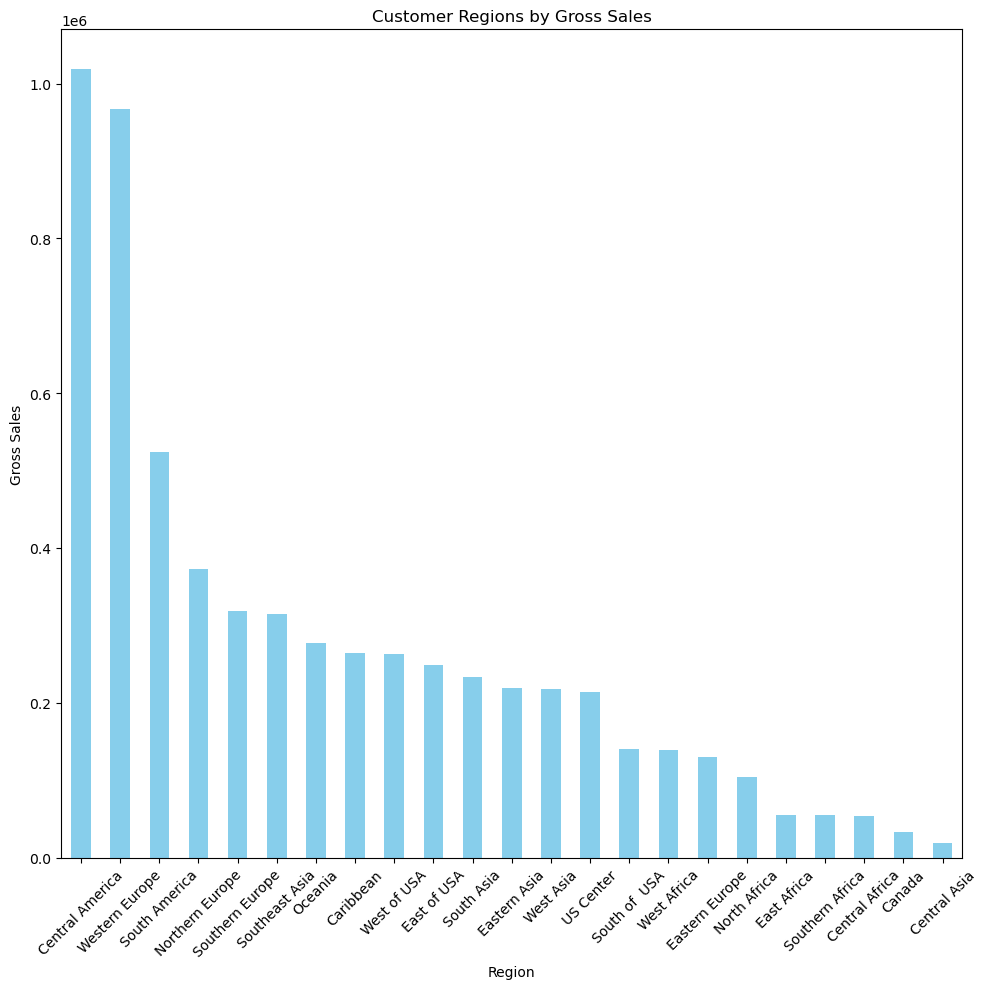

Customer Region
Central America    1019057
Western Europe      967053
South America       523447
Northern Europe     372500
Southern Europe     318665
Southeast Asia      314263
Oceania             277325
Caribbean           264483
West of USA         262671
East of USA         248653
South Asia          233320
Eastern Asia        219001
West Asia           217929
US Center           213320
South of  USA       140798
West Africa         138929
Eastern Europe      129906
North Africa        104489
East Africa          55379
Southern Africa      54828
Central Africa       53267
Canada               33456
Central Asia         18737
Name: Gross Sales, dtype: int64


In [228]:
# Regions based on sales volume 
top_regions = df.groupby('Customer Region')['Gross Sales'].sum().sort_values(ascending=False).head(25)

# plot 
top_regions.plot(kind='bar', figsize=(10,10), color='skyblue')

plt.title('Customer Regions by Gross Sales')
plt.xlabel('Region')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_regions)

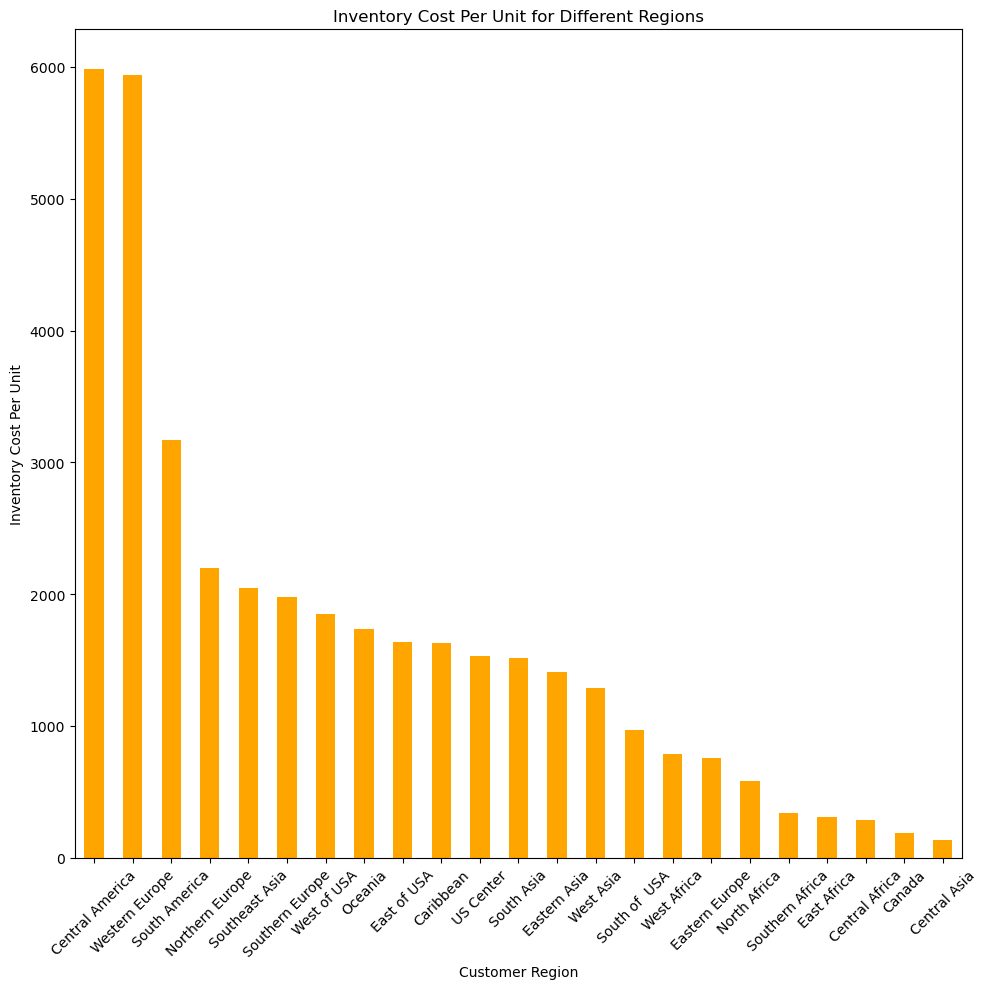

Customer Region
Central America    5986.49199
Western Europe     5938.55364
South America      3168.86897
Northern Europe    2197.33985
Southeast Asia     2043.27816
Southern Europe    1978.14658
West of USA        1848.81917
Oceania            1734.52483
East of USA        1637.30864
Caribbean          1626.17097
US Center          1533.18348
South Asia         1516.66399
Eastern Asia       1405.53915
West Asia          1290.15445
South of  USA       972.26978
West Africa         789.63344
Eastern Europe      753.73919
North Africa        584.96806
Southern Africa     337.75041
East Africa         308.66408
Central Africa      289.10240
Canada              184.52232
Central Asia        135.22659
Name: Inventory Cost Per Unit, dtype: float64


In [229]:
# Regions inventory cost
top_regions_inv_cost = df.groupby('Customer Region')['Inventory Cost Per Unit'].sum().sort_values(ascending=False)

top_regions_inv_cost.plot(kind='bar', figsize=(10,10), color='orange')

plt.title('Inventory Cost Per Unit for Different Regions')
plt.xlabel('Customer Region')
plt.ylabel('Inventory Cost Per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_regions_inv_cost)

## **Product Department**

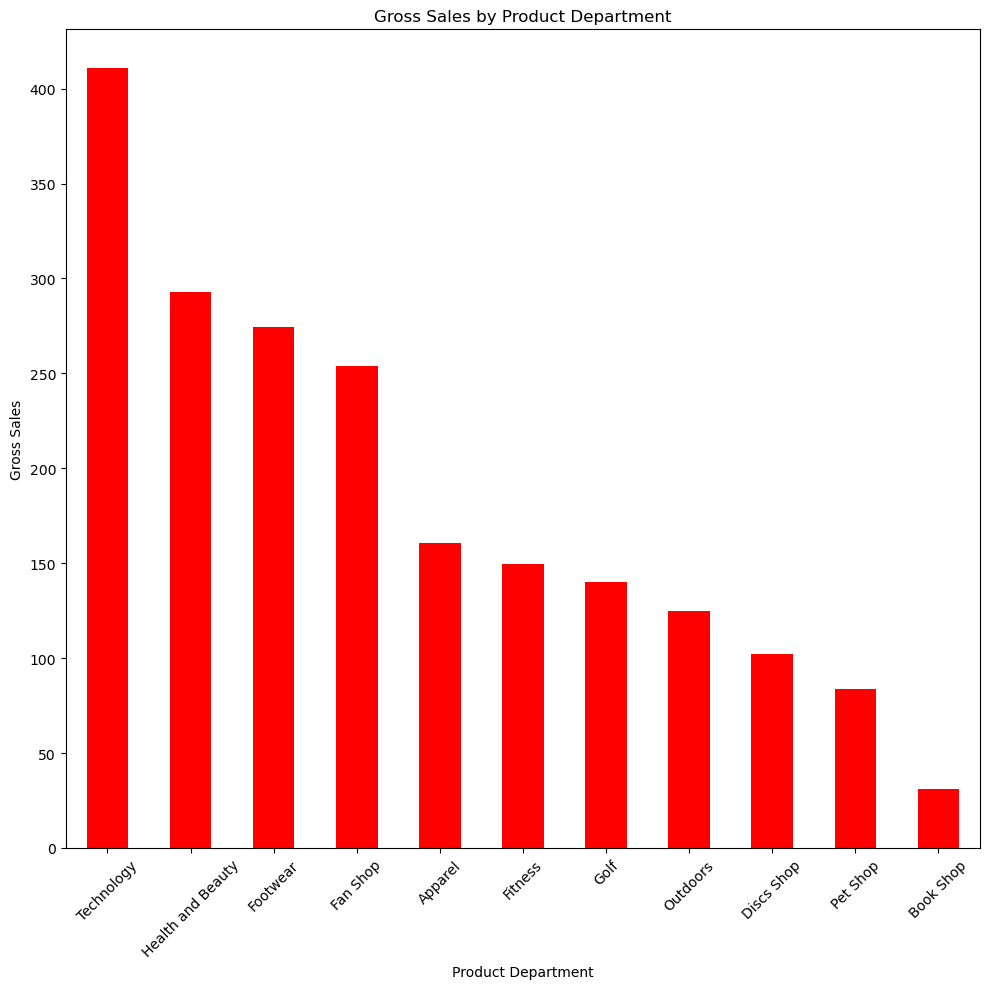

In [230]:
product_department_sales = df.groupby('Product Department')['Gross Sales'].mean().sort_values(ascending=False)

product_department_sales.plot(kind='bar', figsize=(10,10), color='red')

plt.title('Gross Sales by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

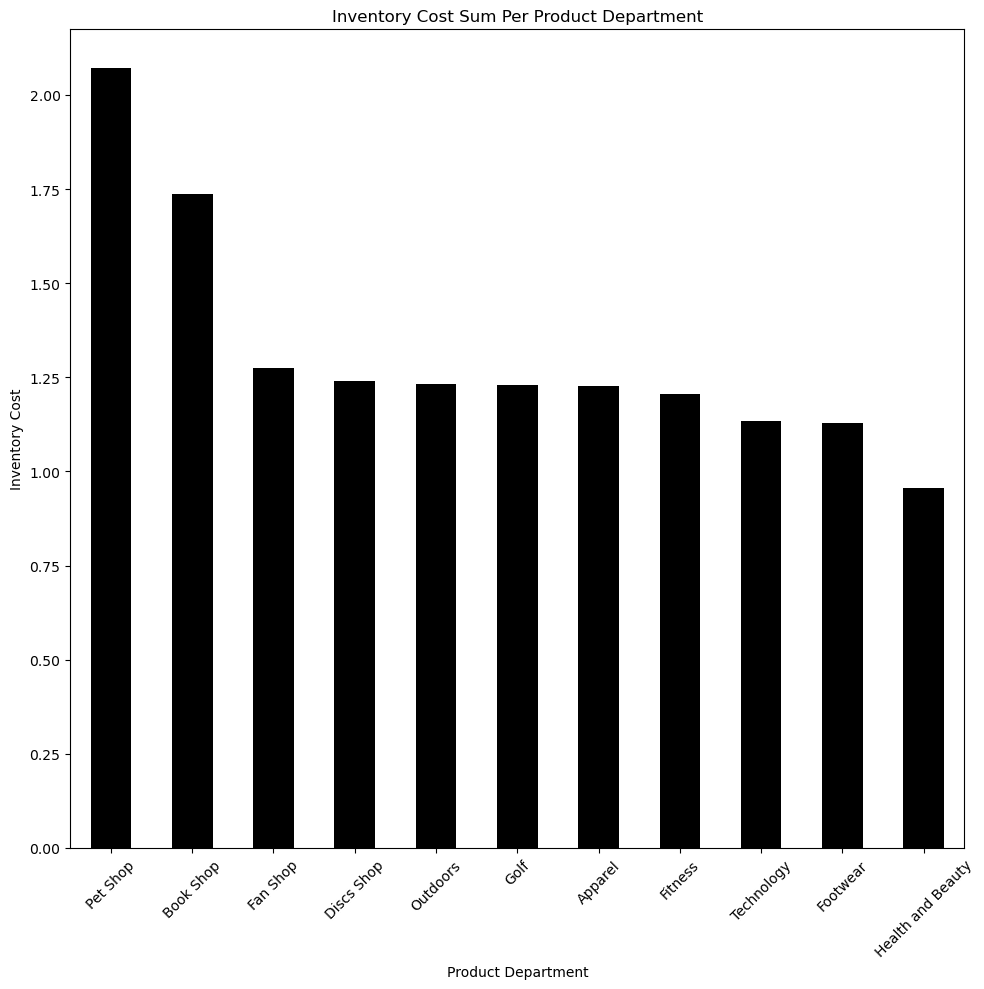

In [231]:
# inventory by product department 
inv_cost_by_department = df.groupby('Product Department')['Inventory Cost Per Unit'].mean().sort_values(ascending=False)

inv_cost_by_department.plot(kind='bar', figsize=(10,10), color='black')

plt.title('Inventory Cost Sum Per Product Department')
plt.xlabel('Product Department')
plt.ylabel('Inventory Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

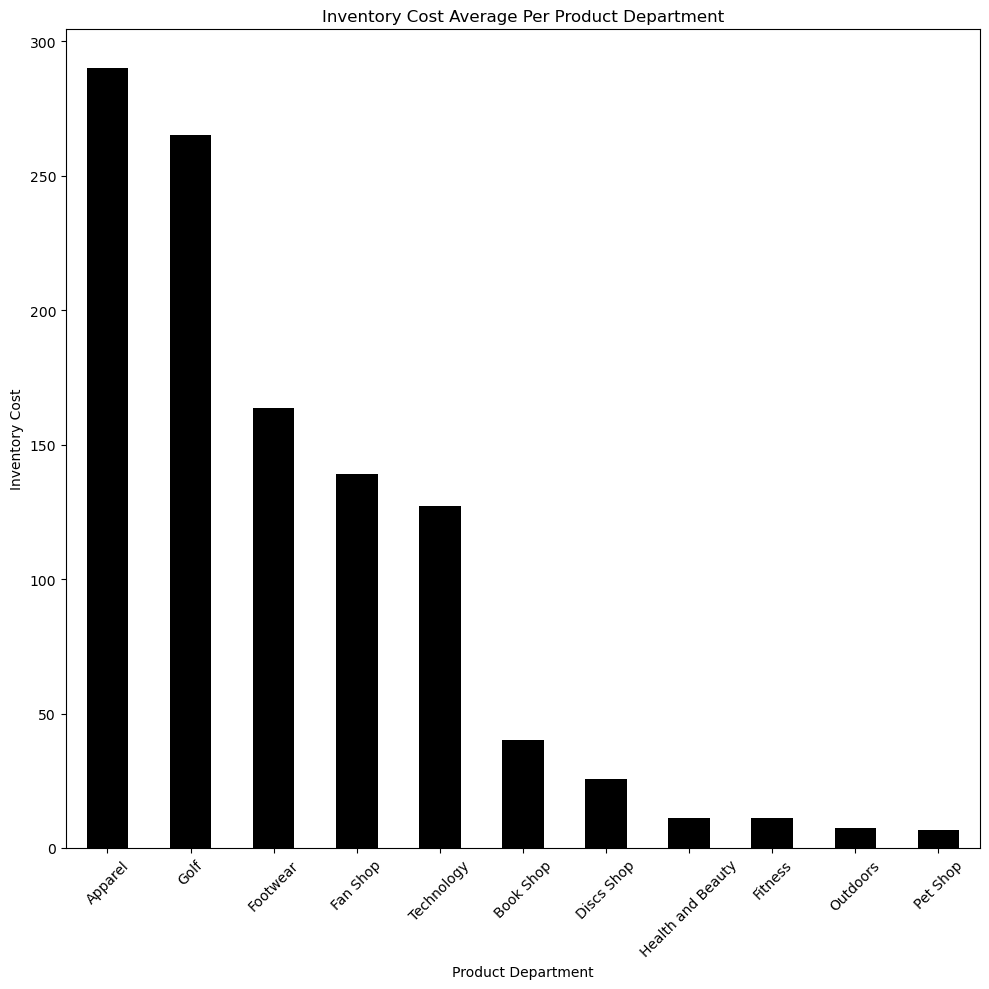

In [232]:
# inventory by product department 
inv_cost_by_department = df.groupby('Product Department')['Warehouse Inventory'].mean().sort_values(ascending=False)

inv_cost_by_department.plot(kind='bar', figsize=(10,10), color='black')

plt.title('Inventory Cost Average Per Product Department')
plt.xlabel('Product Department')
plt.ylabel('Inventory Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Time Trends**

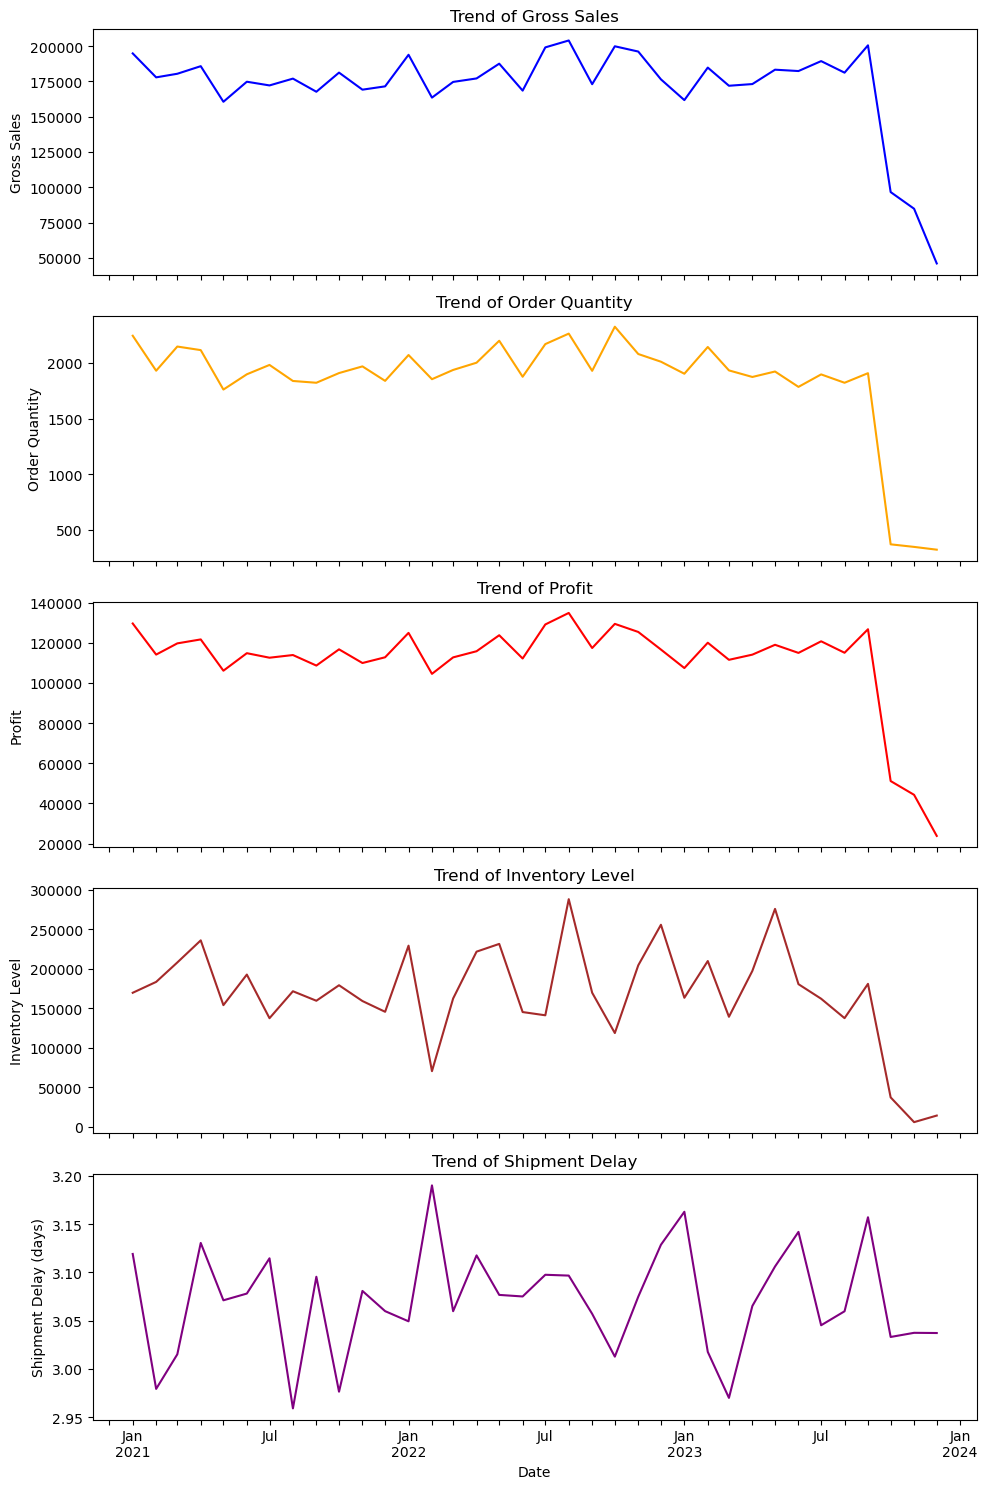

In [233]:
# Grouping and sorting data
trend_gross_sales = df.groupby('date')['Gross Sales'].sum().sort_index()
trend_order_volume = df.groupby('date')['Order Quantity'].sum().sort_index()
trend_profit = df.groupby('date')['Profit'].sum().sort_index()
trend_inventory_level = df.groupby('date')['Warehouse Inventory'].sum().sort_index()
trend_shipment_delay = df.groupby('date')['Shipment Days - Scheduled'].mean().sort_index()

# Creating subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

# Plotting each trend
axs[0].plot(trend_gross_sales, color='blue')
axs[0].set_title('Trend of Gross Sales')
axs[0].set_ylabel('Gross Sales')

axs[1].plot(trend_order_volume, color='orange')
axs[1].set_title('Trend of Order Quantity')
axs[1].set_ylabel('Order Quantity')

axs[2].plot(trend_profit, color='red')
axs[2].set_title('Trend of Profit')
axs[2].set_ylabel('Profit')

axs[3].plot(trend_inventory_level, color='brown')
axs[3].set_title('Trend of Inventory Level')
axs[3].set_ylabel('Inventory Level')

axs[4].plot(trend_shipment_delay, color='purple')
axs[4].set_title('Trend of Shipment Delay')
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Shipment Delay (days)')

# Rotate x-axis labels only on the bottom plot
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Custom formatter for Jan and Jul
def jan_jul_formatter(x, pos):
    date = mdates.num2date(x)
    if date.month == 1:
        return date.strftime('Jan\n%Y')  # Jan and year on new line
    elif date.month == 7:
        return 'Jul'
    else:
        return ''

# Apply custom ticks
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(FuncFormatter(jan_jul_formatter))
    ax.tick_params(axis='x', which='major', rotation=0)


plt.tight_layout()
plt.show()

### **Product Trends**

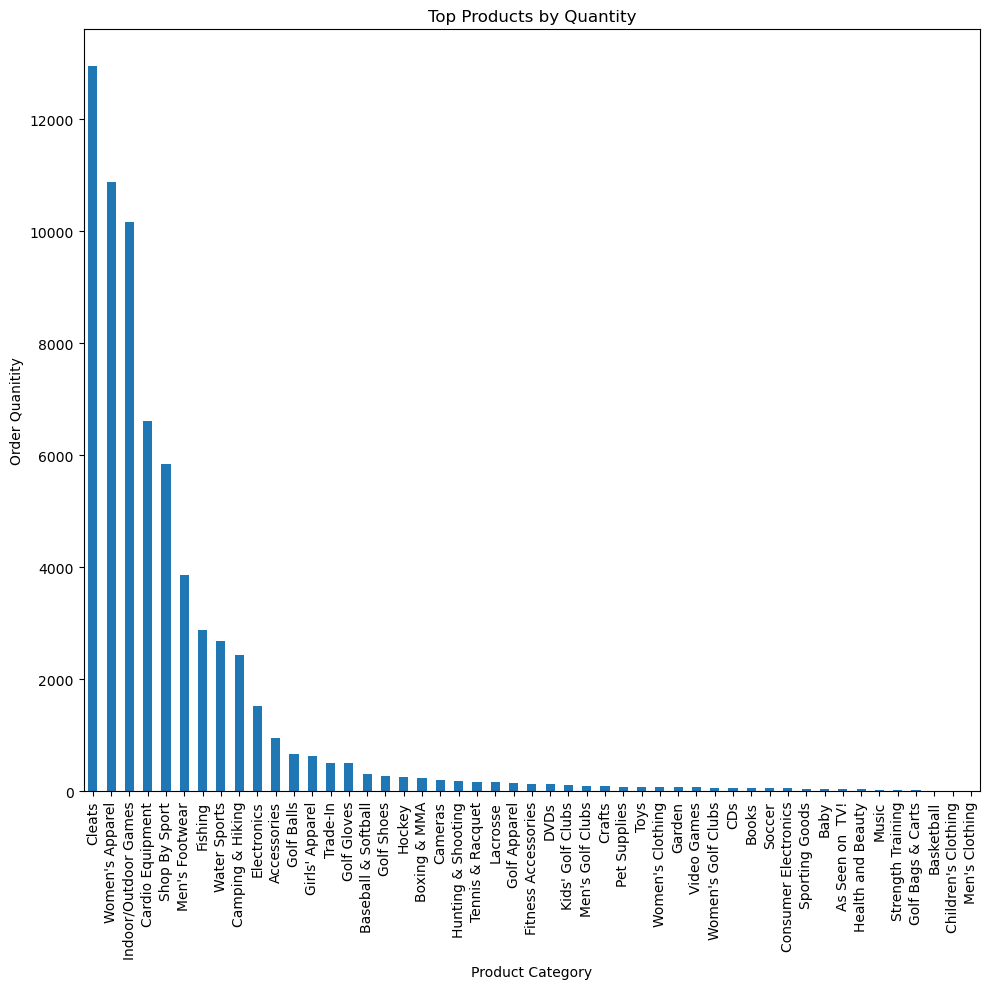

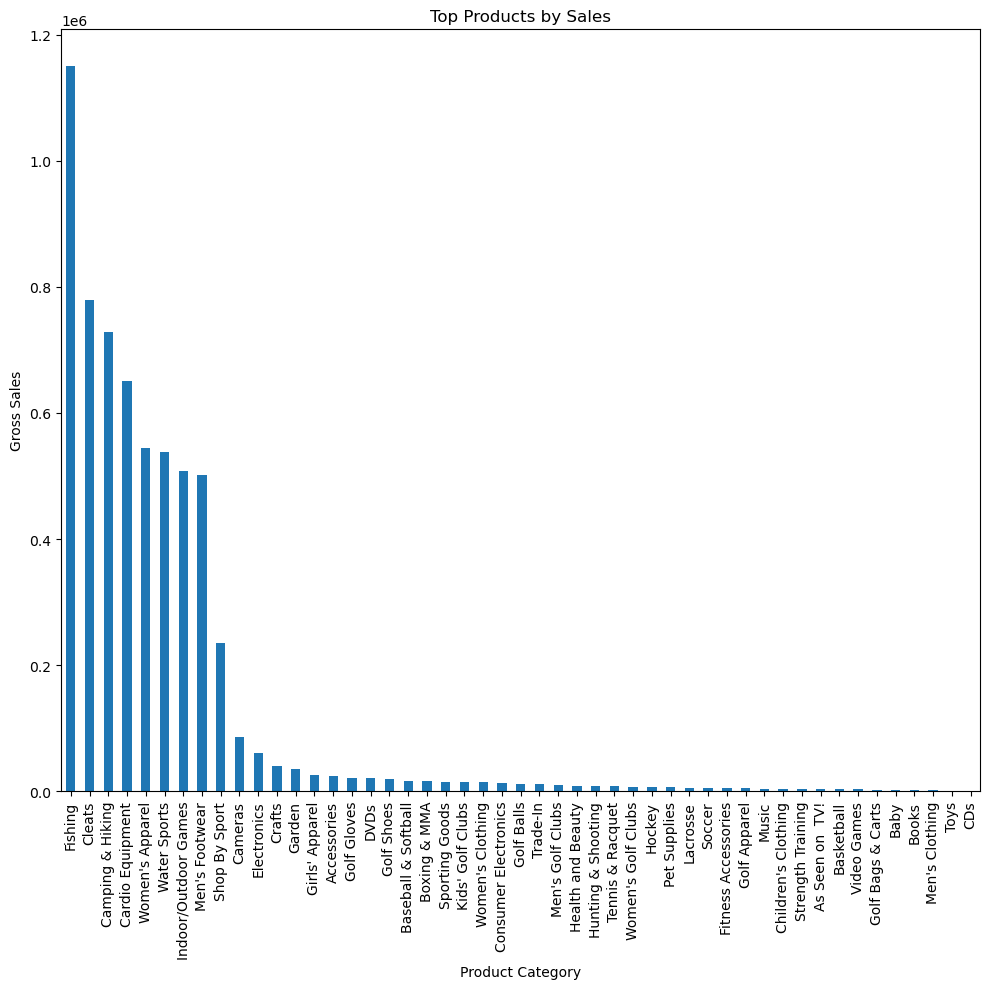

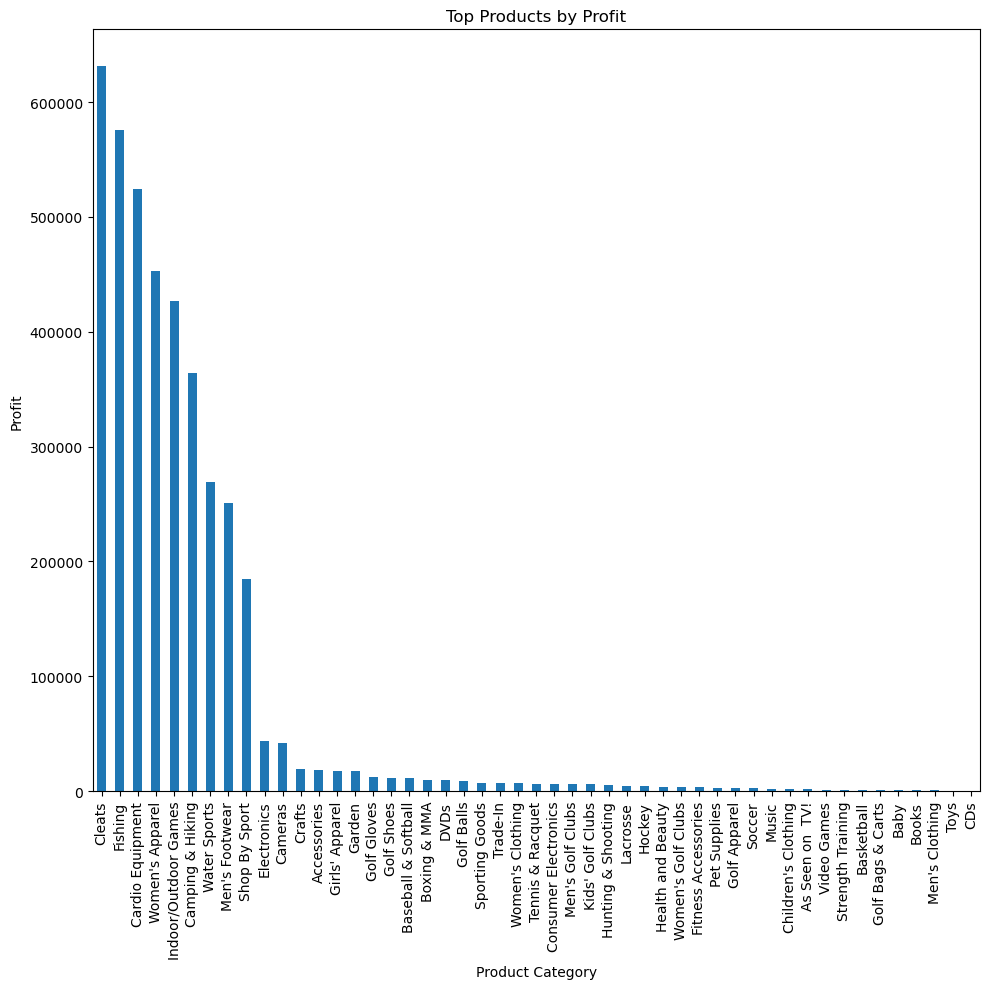

In [234]:
# Top selling products by Quantity
top_products_by_quantity = df.groupby('Product Category')['Order Quantity'].sum().sort_values(ascending=False)

top_products_by_quantity.plot(kind='bar', figsize=(10,10))
plt.title('Top Products by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Order Quanitity')
plt.tight_layout()
plt.show()

# Top Selling products by sales
top_products_by_sales = df.groupby('Product Category')['Gross Sales'].sum().sort_values(ascending=False)

top_products_by_sales.plot(kind='bar', figsize=(10,10))
plt.title('Top Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Gross Sales')
plt.tight_layout()
plt.show()

# Top profitable products
top_products_by_profit = df.groupby('Product Category')['Profit'].sum().sort_values(ascending=False)

top_products_by_profit.plot(kind='bar', figsize=(10,10))
plt.title('Top Products by Profit')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

In [235]:
df.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Day',
       'Order Time', 'Order Quantity', 'Product Department',
       'Product Category', 'Product Name', 'Customer ID', 'Customer Market',
       'Customer Region', 'Customer Country', 'Warehouse Country',
       'Shipment Day', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Date', 'date', 'Year Month',
       'Warehouse Inventory', 'Inventory Cost Per Unit'],
      dtype='object')

### **Product Performance Category-Wise**

In [236]:
category_perf = df.groupby('Product Category').agg({
    'Gross Sales': 'sum',
    'Profit': 'sum',
    'Order Quantity': 'sum',
    'Discount %': 'mean',
    'Product Name': 'nunique'
}).rename(columns={'Product Name': 'Unique Products'})

category_perf = category_perf.sort_values('Gross Sales', ascending=False)
print(category_perf)

                      Gross Sales  Profit  Order Quantity  Discount %  \
Product Category                                                        
Fishing                   1151200  575600            2878    0.109693   
Cleats                     778920  631740           12958    0.107365   
Camping & Hiking           728100  364050            2427    0.106902   
Cardio Equipment           650270  524390            6614    0.106863   
Women's Apparel            544300  452750           10886    0.106676   
Water Sports               538650  269304            2688    0.107162   
Indoor/Outdoor Games       508200  427000           10164    0.107825   
Men's Footwear             501150  250575            3855    0.105716   
Shop By Sport              234740  184550            5849    0.108188   
Cameras                     86332   41829             191    0.107253   
Electronics                 59784   43819            1519    0.105923   
Crafts                      39185   19635          

### **Inventory**

In [237]:
# Inventory Turnover
turnover = df.groupby('Product Name').agg({
    'Order Quantity': 'sum',
    'Warehouse Inventory': 'sum'
}).rename(columns={
    'Order Quantity': 'Total Orders',
    'Warehouse Inventory': 'Total Inventory'
})

# Avoid divide-by-zero
turnover['Inventory Turnover'] = turnover['Total Orders'] / turnover['Total Inventory'].replace(0, np.nan)

# Sort highest to lowest
turnover = turnover.sort_values('Inventory Turnover', ascending=False)

print(turnover.head(60)) 

                                               Total Orders  Total Inventory  \
Product Name                                                                   
GoPro HERO3+ Black Edition Camera                         2                1   
Titleist Small Wheeled Travel Cover                       8                6   
LIJA Women's Mid-Length Panel Golf Shorts                33               27   
Total Gym 1400                                            6                6   
Polar FT4 Heart Rate Monitor                             33               35   
Cleveland Golf Women's 588 RTX CB Satin Chrom             6                7   
Nike Women's Free 5.0 TR FIT PRT 4 Training S            52               62   
Mio ALPHA Heart Rate Monitor/Sport Watch                 11               15   
Ogio Race Golf Shoes                                     13               19   
Bag Boy M330 Push Cart                                   31               47   
GolfBuddy VT3 GPS Watch                 

Product Name
Industrial consumer electronics                  26
Under Armour Kids' Mercenary Slide               12
First aid kit                                    11
Team Golf San Francisco Giants Putter Grip       10
Top Flite Women's 2023 XL Hybrid                 10
Clicgear Rovic Cooler Bag                        10
Fighting video games                              9
Titleist Pro V1x High Numbers Personalized Go     9
Perfect Fitness Perfect Rip Deck                  8
Nike Women's Tempo Shorts                         8
dtype: int64


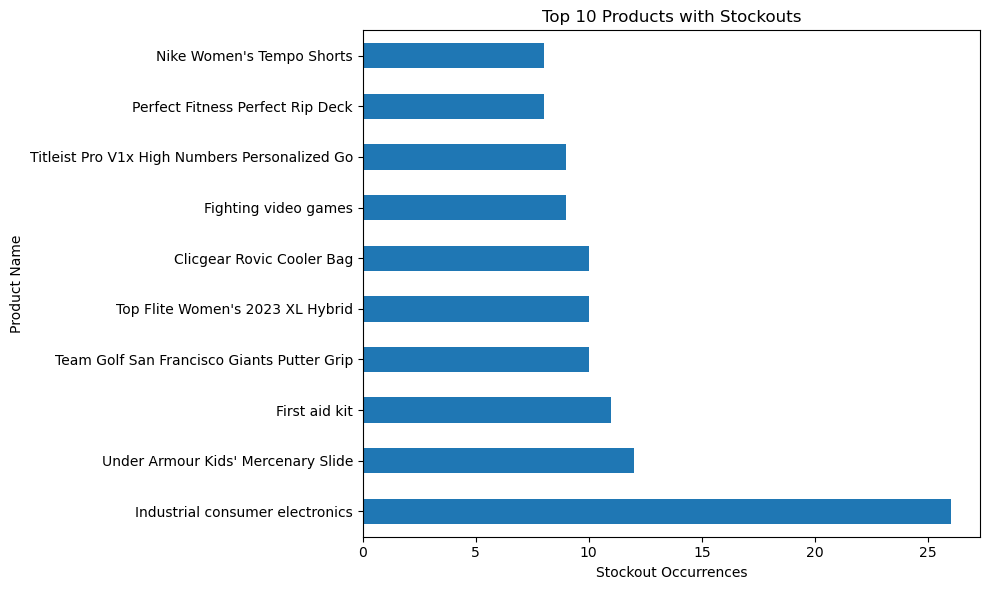

In [238]:
# Flag rows where inventory is 0 or below a threshold (e.g., 5)
df['Stockout'] = df['Warehouse Inventory'] <= 0  # or <= 5

# Count stockouts per product or date
stockout_counts = df[df['Stockout']].groupby('Product Name').size().sort_values(ascending=False)
print(stockout_counts.head(10))  # Top 10 products with most stockouts

stockout_counts.head(10).plot(kind='barh', figsize=(10,6), title='Top 10 Products with Stockouts')
plt.xlabel('Stockout Occurrences')
plt.tight_layout()
plt.show()

                                               Inventory Value  Gross Sales  \
Product Name                                                                  
Perfect Fitness Perfect Rip Deck                  2.522964e+06       777120   
Nike Men's Dri-FIT Victory Golf Polo              1.576860e+06       544300   
O'Brien Men's Neoprene Life Vest                  1.237267e+06       508200   
Nike Men's CJ Elite 2 TD Football Cleat           5.618316e+05       501150   
Nike Men's Free 5.0+ Running Shoe                 4.356271e+05       645500   
Field & Stream Sportsman 16 Gun Fire Safe         3.152371e+05      1151200   
Under Armour Girls' Toddler Spine Surge Runni     2.941879e+05       227560   
Pelican Sunstream 100 Kayak                       2.637823e+05       536200   
Diamondback Women's Serene Classic Comfort Bi     2.017903e+05       728100   
Web Camera                                        2.742712e+04        86332   

                                               Prof

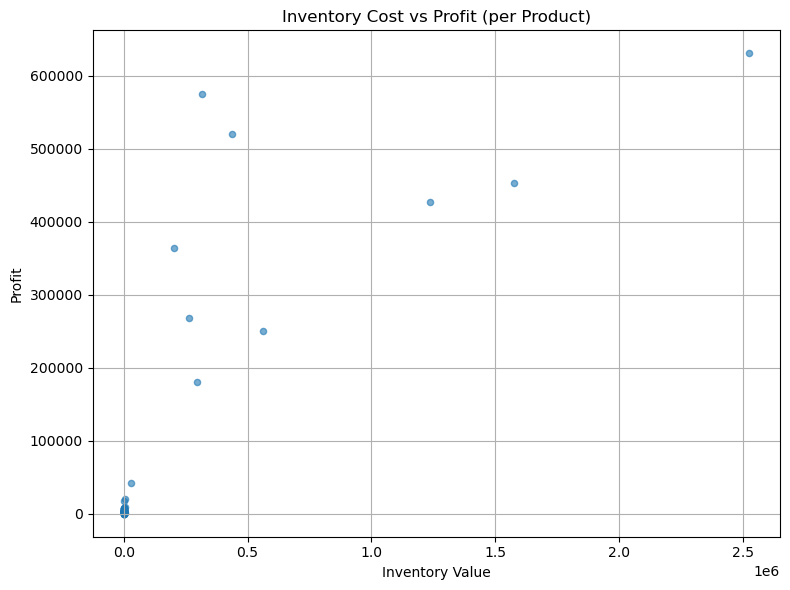

In [239]:
# Inventory Cost vs Sales/Profit
df['Inventory Value'] = df['Warehouse Inventory'] * df['Inventory Cost Per Unit']

inv_vs_profit = df.groupby('Product Name').agg({
    'Inventory Value': 'sum',
    'Gross Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Inventory Value', ascending=False)

print(inv_vs_profit.head(10))

inv_vs_profit.plot.scatter(x='Inventory Value', y='Profit', alpha=0.6, figsize=(8,6))
plt.title('Inventory Cost vs Profit (per Product)')
plt.grid(True)
plt.tight_layout()
plt.show()

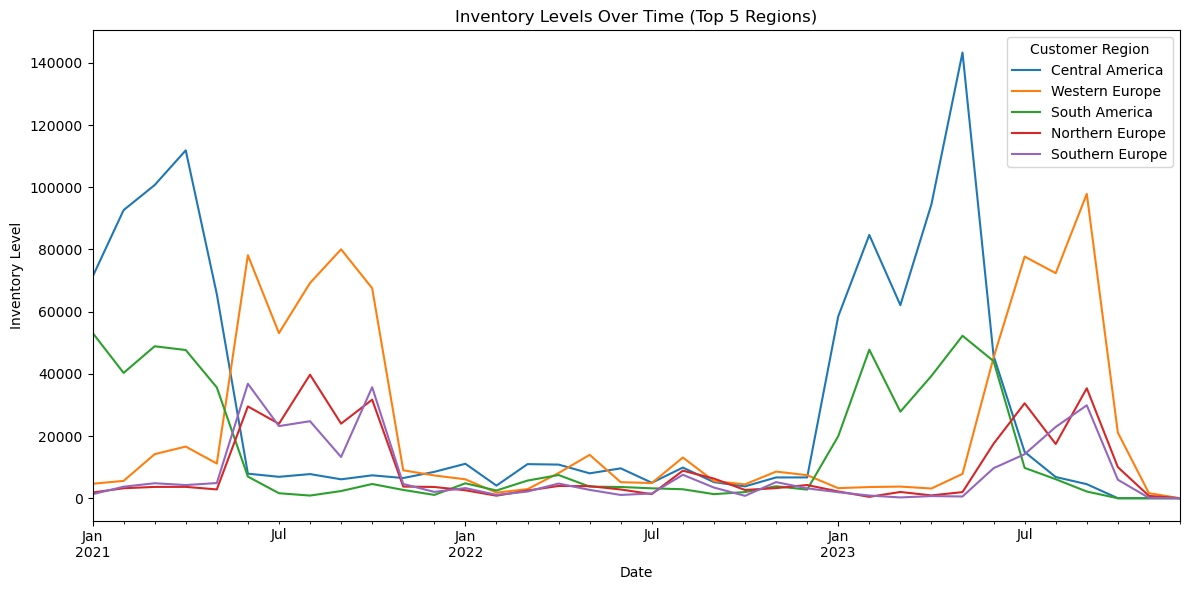

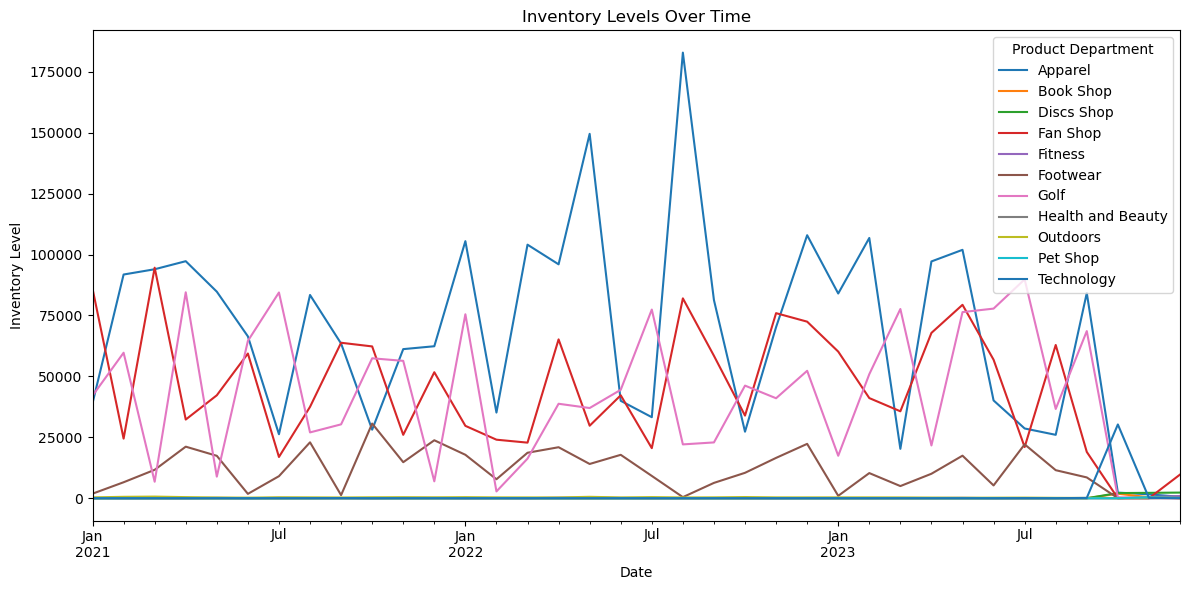

In [240]:
# Inventory Trends by Region and product
inv_trend = df.groupby(['date', 'Customer Region'])['Warehouse Inventory'].sum().unstack().fillna(0)

# Optional: plot top 5 Regions with highest total inventory
top_products = df.groupby('Customer Region')['Warehouse Inventory'].sum().nlargest(5).index
inv_trend[top_products].plot(figsize=(12,6), title='Inventory Levels Over Time (Top 5 Regions)')
plt.ylabel('Inventory Level')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


inv_trend = df.groupby(['date', 'Product Department'])['Warehouse Inventory'].sum().unstack().fillna(0)

# Optional: plot top 5 products with highest total inventory
top_products = df.groupby('Product Department')['Warehouse Inventory'].sum().index
inv_trend[top_products].plot(figsize=(12,6), title='Inventory Levels Over Time')
plt.ylabel('Inventory Level')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

### **Discount Effect On Sales**

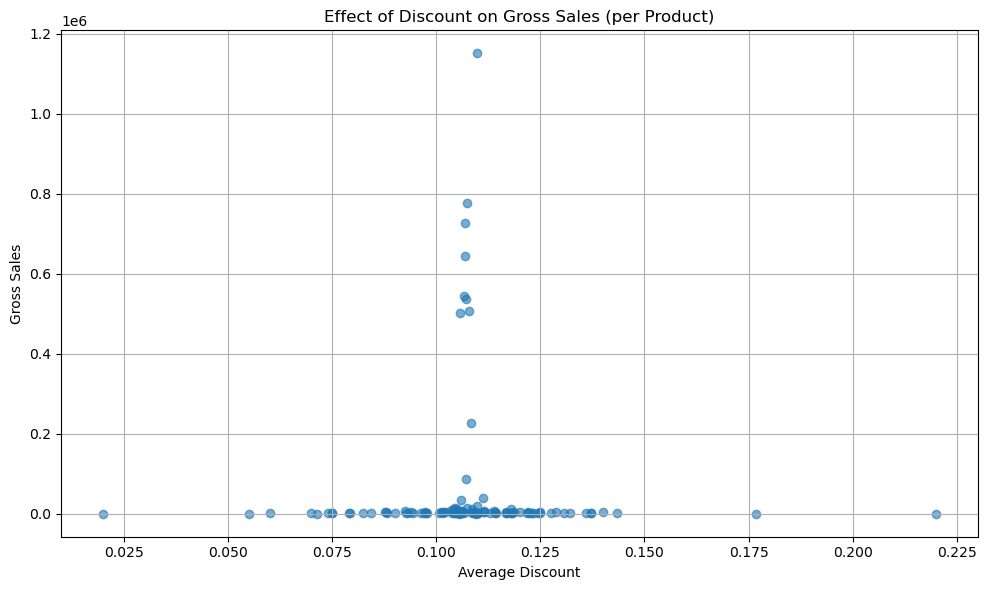

In [241]:
discount_sales = df.groupby('Product Name').agg({
    'Gross Sales': 'sum',
    'Discount %': 'mean'
})

# Scatter plot: Discount vs Gross Sales
plt.figure(figsize=(10,6))
plt.scatter(discount_sales['Discount %'], discount_sales['Gross Sales'], alpha=0.6)
plt.title('Effect of Discount on Gross Sales (per Product)')
plt.xlabel('Average Discount')
plt.ylabel('Gross Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [242]:
correlation = discount_sales['Discount %'].corr(discount_sales['Gross Sales'])
print(f"Correlation between Discount and Sales: {correlation:.2f}")

Correlation between Discount and Sales: 0.01


**Observations:**
- Concentration Around 10% Discount:

    1. Most products have an average discount around 0.10 (10%).

    2. This might indicate a standard discounting strategy.

- Sales Spike for Some Products:

    1. A few products with around 10–12% discount show very high sales (up to 1.2 million).

    2. These are likely best-selling items or high-demand products that responded well to the discount.

- Many Products with Low Sales:

    1. Most dots are clustered near the bottom (low sales), regardless of discount.

    2. Suggests discounting alone doesn’t guarantee high sales.

- No Clear Correlation Across the Board:

    1. There's no obvious upward or downward trend across the entire chart, so more discount ≠ more sales universally.

**Key Insight:**
- A moderate discount (~10%) might correlate with strong sales for some products, but not all.

- This implies that other factors (like product type, demand, seasonality, etc.) also influence sales, not just discount level.

### **Shipment**

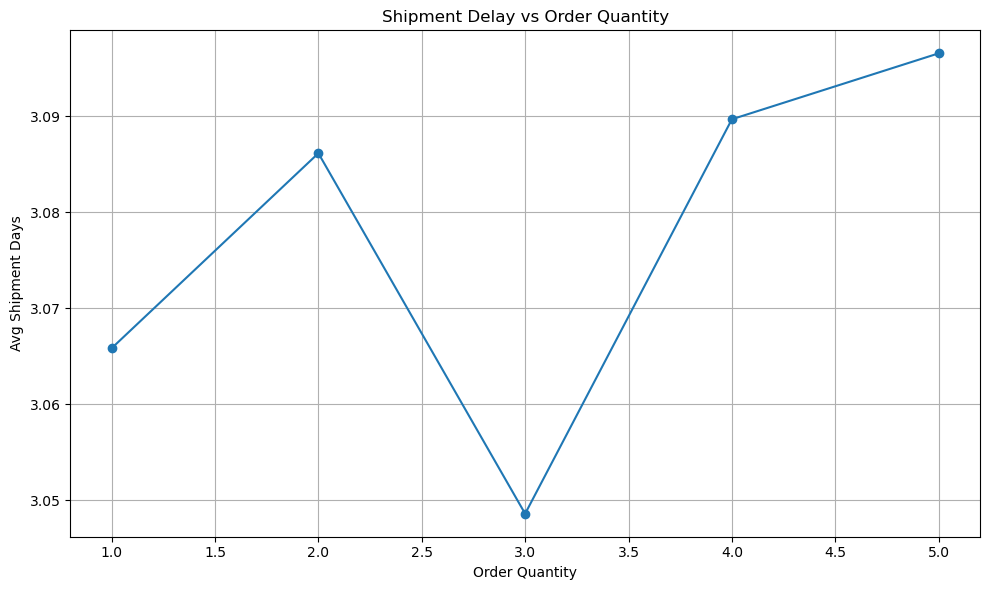

In [243]:
# Shipment delay vs order quantity 
shipment_trend = df.groupby('Order Quantity')['Shipment Days - Scheduled'].mean()

shipment_trend.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Shipment Delay vs Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Avg Shipment Days')
plt.grid(True)
plt.tight_layout()
plt.show()

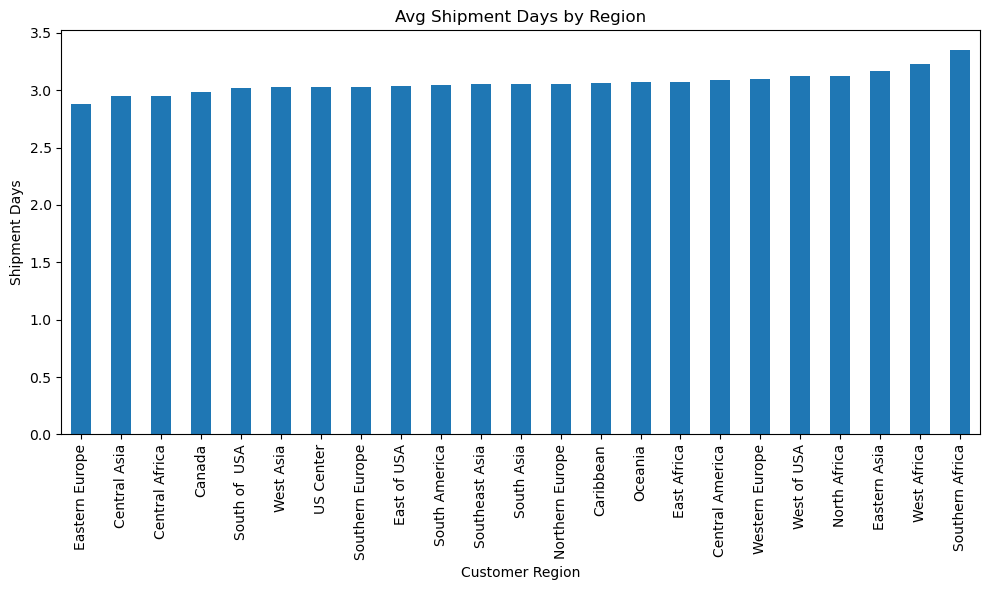

In [244]:
# Shipmenty speed by region
region_delay = df.groupby('Customer Region')['Shipment Days - Scheduled'].mean().sort_values()

region_delay.plot(kind='bar', figsize=(10,6), title='Avg Shipment Days by Region')
plt.ylabel('Shipment Days')
plt.tight_layout()
plt.show()

### **Efficiency & Operational KPIs**

- Profit Margin = profit/gross sales
- Discount impact
- Inventory Cost efficiency = profit/inventory cost
- Fulfillment lag = Shipment date scheduled - shipment date

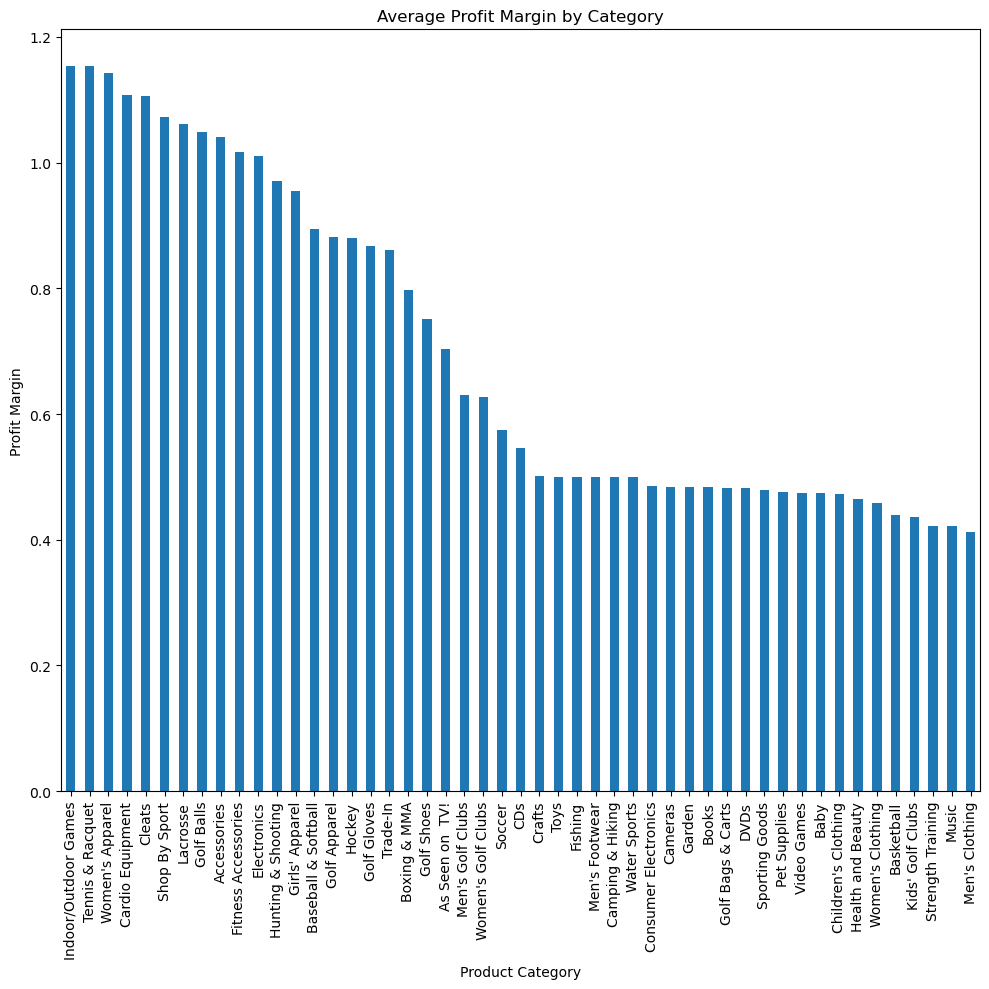

In [245]:
# Profit Margin 
df['Profit Margin'] = df['Profit'] / df['Gross Sales']

margin_by_category = df.groupby('Product Category')['Profit Margin'].mean().sort_values(ascending=False)
margin_by_category.plot(kind='bar', figsize=(10,10), title='Average Profit Margin by Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin')
plt.tight_layout()
plt.show()

In [246]:
# Correlation of discount with gross sales and profit
print("Discount vs Gross Sales correlation:", df['Discount %'].corr(df['Gross Sales']))
print("Discount vs Profit Margin correlation:", df['Discount %'].corr(df['Profit']))

Discount vs Gross Sales correlation: 0.004239565548044259
Discount vs Profit Margin correlation: 0.006129408551504688


In [247]:
# Inventory Cost Efficiency 
df['Inventory Cost'] = df['Warehouse Inventory'] * df['Inventory Cost Per Unit']

df['Inventory Efficiency'] = df.apply(
    lambda row: row['Gross Sales'] / row['Inventory Cost'] if row['Inventory Cost'] != 0 else 0,
    axis=1
)

efficiency = df.groupby('Product Name')['Inventory Efficiency'].mean().sort_values(ascending=False)
print(efficiency.head(10))

Product Name
Total Gym 1400                                   1356.216188
Garmin Approach S4 Golf GPS Watch                 847.888757
Garmin Forerunner 910XT GPS Watch                 285.076734
Lawn mower                                        197.839631
Children's heaters                                190.339976
Ogio Race Golf Shoes                              183.611133
LIJA Women's Mid-Length Panel Golf Shorts         146.748837
GoPro HERO3+ Black Edition Camera                 145.890626
Cleveland Golf Women's 588 RTX CB Satin Chrom     135.827558
Titleist Club Glove Travel Cover                  129.591472
Name: Inventory Efficiency, dtype: float64


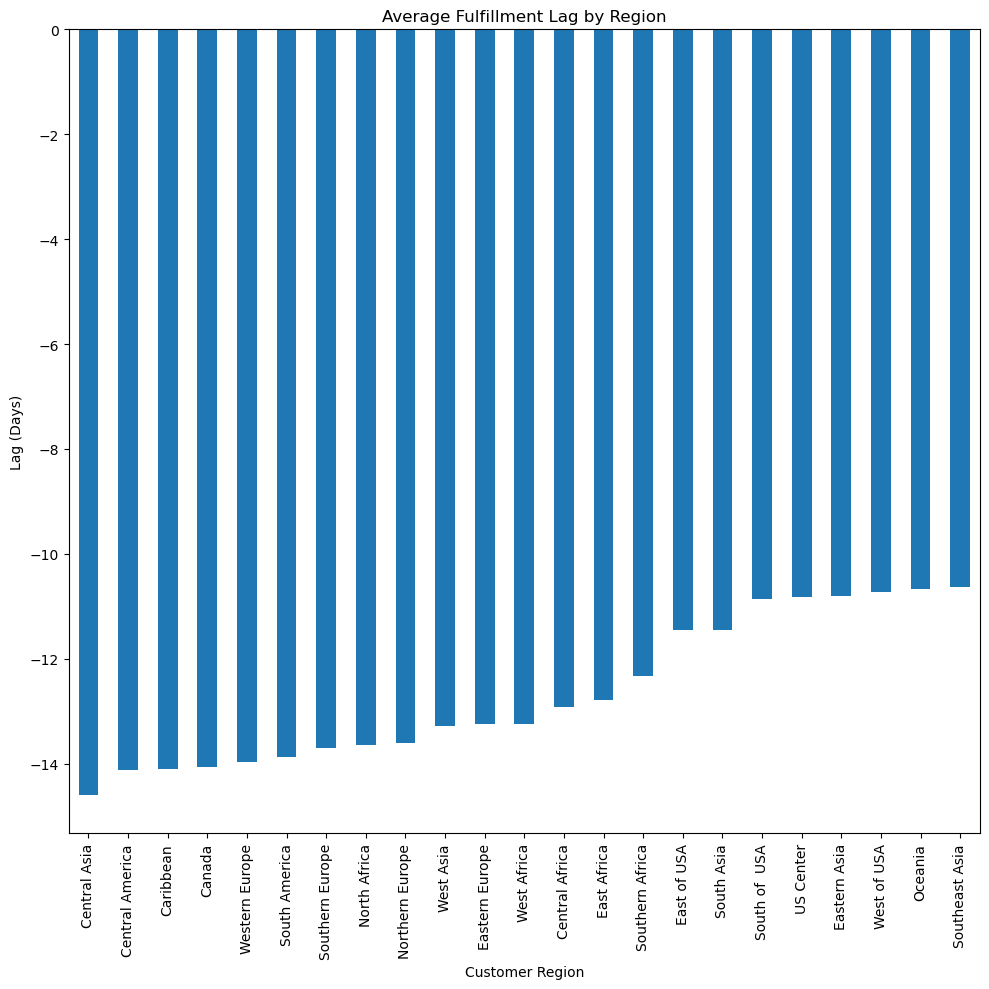

In [248]:
# Order fulfillment lag
df['Fulfillment Lag (days)'] = df['Shipment Days - Scheduled'] - df['Shipment Day']

lag_by_region = df.groupby('Customer Region')['Fulfillment Lag (days)'].mean().sort_values()

lag_by_region.plot(kind='bar', figsize=(10,10), title='Average Fulfillment Lag by Region')
plt.ylabel('Lag (Days)')
plt.tight_layout()
plt.show()

### **Economic Order Quantity (EOQ) and Reorder Point**

In [249]:
# Daily demand 
df['Daily Demand'] = df.groupby(['date', 'Product Name'])['Order Quantity'].transform(sum)

# Map shipment cost per order
shipment_cost_map = {
    'Same Day': 40,
    'First Class': 30,
    'Standard Class': 20,
    'Second Class': 15
}
df['Estimated Ordering Cost'] = df['Shipment Mode'].map(shipment_cost_map)

df['Ordering_cost_per_product'] = df.groupby('Product Name')['Estimated Ordering Cost'].transform('mean')

df['latest_cost'] = df.groupby('Product Name')['Inventory Cost Per Unit'].transform('last')

# Average lead time per product (in days)
df['lead_time'] = df.groupby('Product Name')['Shipment Days - Scheduled'].transform('mean')

# Holding cost per unit
holding_rate = 0.20  # 20%
df['holding_cost'] = df['latest_cost'] * holding_rate

# Monthly demand (via daily summed demand → monthly average)
# Step 1: Daily demand per product
daily_demand = df.groupby(['Product Name', 'date'])['Order Quantity'].sum().reset_index()
daily_demand['monthly_demand'] = daily_demand.groupby('Product Name')['Order Quantity'].transform('mean')

# Weekly Demand 
df['Weekly Demand'] = df['Daily Demand'].rolling(window=7, min_periods=1).std()

# Step 2: Merge back to df
df = df.merge(daily_demand[['Product Name', 'date', 'monthly_demand']], on=['Product Name', 'date'], how='left')

# Calculate EOQ
df['EOQ'] = np.sqrt((2 * df['Daily Demand'] * df['Ordering_cost_per_product']) / df['holding_cost'])

# Reorder point = lead_time * daily demand
df['reorder_point'] = df['lead_time'] * df['Daily Demand']

df['days of supply'] = df['EOQ']/df['Daily Demand']

In [250]:
df.head(50)

,Order ID,Order Item ID,Order YearMonth,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Estimated Ordering Cost,Ordering_cost_per_product,latest_cost,lead_time,holding_cost,Weekly Demand,monthly_demand,EOQ,reorder_point,days of supply
0,1,4381,202101,1,2:48,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,7399,...,40,21.717643,1.60905,3.034689,0.321810,NaN,81.242424,107.738468,260.983215,1.252773
1,2,29,202101,1,3:30,1,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,918,...,20,21.993243,0.69517,3.063141,0.139034,261.629509,359.777778,379.823253,1396.792171,0.832946
2,3,32,202101,1,3:30,4,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,918,...,20,21.686265,1.26321,3.071025,0.252642,185.655595,179.305556,204.667799,749.330198,0.838802
3,4,33,202101,1,3:30,5,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,918,...,20,21.869145,2.00230,3.098653,0.400460,166.552294,298.941176,209.016863,1239.461358,0.522542
4,5,109801,202101,1,4:12,5,Footwear,Electronics,Under Armour Women's Ignite Slide,6124,...,20,22.142857,1.00809,2.928571,0.201618,191.744622,6.958333,55.453785,41.000000,3.960985
5,6,9902,202101,1,4:54,5,Outdoors,Electronics,Bridgestone e6 Straight Distance NFL San Dieg,702,...,40,23.958333,1.86183,3.000000,0.372366,196.512001,5.280000,25.365492,15.000000,5.073098
6,7,46,202101,1,4:54,3,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,2568,...,20,21.993243,0.69517,3.063141,0.139034,203.671888,359.777778,379.823253,1396.792171,0.832946
7,8,43,202101,1,4:54,1,Golf,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,2568,...,20,21.818056,1.29291,3.086692,0.258582,193.344129,302.388889,229.456930,963.048040,0.735439
8,9,44,202101,1,4:54,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,2568,...,20,21.717643,1.60905,3.034689,0.321810,184.245049,81.242424,107.738468,260.983215,1.252773
9,10,47,202101,1,4:54,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,2568,...,20,21.982279,1.49661,3.048297,0.299322,189.198938,87.212121,117.502192,286.539958,1.250023


In [251]:
df

,Order ID,Order Item ID,Order YearMonth,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,...,Estimated Ordering Cost,Ordering_cost_per_product,latest_cost,lead_time,holding_cost,Weekly Demand,monthly_demand,EOQ,reorder_point,days of supply
0,1,4381,202101,1,2:48,1,Fan Shop,Water Sports,Pelican Sunstream 100 Kayak,7399,...,40,21.717643,1.60905,3.034689,0.321810,NaN,81.242424,107.738468,260.983215,1.252773
1,2,29,202101,1,3:30,1,Apparel,Cleats,Perfect Fitness Perfect Rip Deck,918,...,20,21.993243,0.69517,3.063141,0.139034,261.629509,359.777778,379.823253,1396.792171,0.832946
2,3,32,202101,1,3:30,4,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,918,...,20,21.686265,1.26321,3.071025,0.252642,185.655595,179.305556,204.667799,749.330198,0.838802
3,4,33,202101,1,3:30,5,Fan Shop,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,918,...,20,21.869145,2.00230,3.098653,0.400460,166.552294,298.941176,209.016863,1239.461358,0.522542
4,5,109801,202101,1,4:12,5,Footwear,Electronics,Under Armour Women's Ignite Slide,6124,...,20,22.142857,1.00809,2.928571,0.201618,191.744622,6.958333,55.453785,41.000000,3.960985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,30867,69831,202312,31,3:53,1,Outdoors,Accessories,Team Golf Texas Longhorns Putter Grip,701,...,15,22.456140,2.24605,2.912281,0.449210,21.354157,6.500000,9.999029,2.912281,9.999029
30867,30868,73992,202312,31,4:56,1,Footwear,Cardio Equipment,Nike Men's Free 5.0+ Running Shoe,8837,...,15,21.686265,1.26321,3.071025,0.252642,22.652657,179.305556,22.694219,9.213076,7.564740
30868,30869,178348,202312,31,7:03,1,Discs Shop,DVDs,DVDs,18586,...,15,20.860656,2.03553,3.090164,0.407106,20.337626,12.200000,57.266444,98.885246,1.789576
30869,30870,180390,202312,31,13:21,1,Apparel,Women's Clothing,Summer dresses,20628,...,20,21.376812,1.36250,2.884058,0.272500,20.337626,13.800000,83.086325,126.898551,1.888326


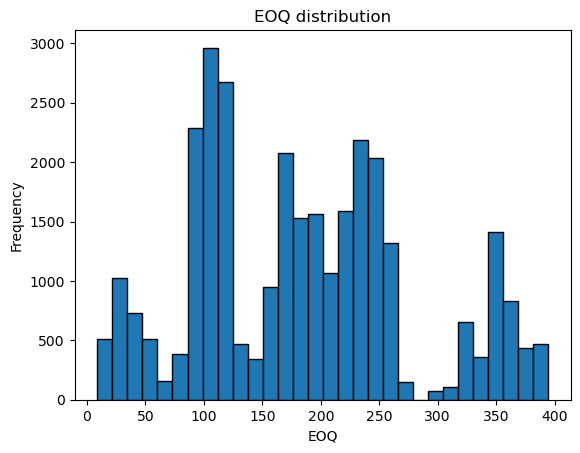

In [252]:
plt.hist(df['EOQ'], bins=30, edgecolor='black')
plt.title('EOQ distribution')
plt.xlabel('EOQ')
plt.ylabel('Frequency')
plt.show()

In [253]:
print("Skewness:", df['EOQ'].skew())
print("Kurtosis:", df['EOQ'].kurt())

Skewness: 0.3725021668685955
Kurtosis: -0.5660160865948916


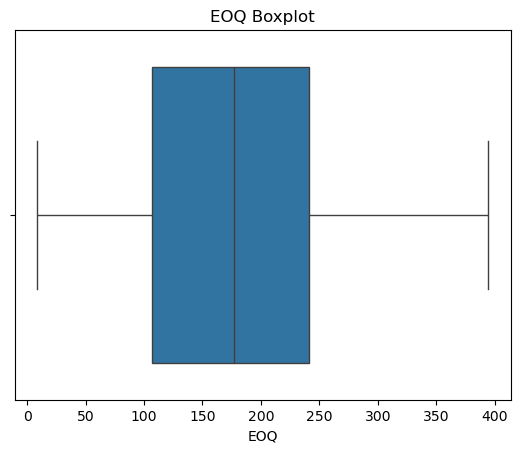

In [254]:
sns.boxplot(x=df['EOQ'])
plt.title('EOQ Boxplot')
plt.show()

In [255]:
df.iloc[0]

Order ID                                               1
Order Item ID                                       4381
Order YearMonth                                   202101
Order Day                                              1
Order Time                                          2:48
Order Quantity                                         1
Product Department                              Fan Shop
Product Category                            Water Sports
Product Name                 Pelican Sunstream 100 Kayak
Customer ID                                         7399
Customer Market                                    LATAM
Customer Region                          Central America
Customer Country                               Nicaragua
Warehouse Country                                    USA
Shipment Day                                           6
Shipment Mode                                   Same Day
Shipment Days - Scheduled                              3
Gross Sales                    

In [256]:
# Flag if current inventory is below or equal to reorder point
df['Restock Now'] = df['Warehouse Inventory'] <= df['reorder_point']
restock_needed = df[df['Restock Now'] == True]
print(restock_needed['Product Name'].unique())

['Pelican Sunstream 100 Kayak' 'Perfect Fitness Perfect Rip Deck'
 "Nike Men's Free 5.0+ Running Shoe" "O'Brien Men's Neoprene Life Vest"
 "Under Armour Women's Ignite Slide"
 'Bridgestone e6 Straight Distance NFL San Dieg'
 "Nike Men's Dri-FIT Victory Golf Polo"
 'Field & Stream Sportsman 16 Gun Fire Safe'
 "adidas Kids' F5 Messi FG Soccer Cleat"
 "Nike Men's CJ Elite 2 TD Football Cleat"
 "Diamondback Women's Serene Classic Comfort Bi"
 "Merrell Men's All Out Flash Trail Running Sho"
 "Under Armour Girls' Toddler Spine Surge Runni" 'Bag Boy Beverage Holder'
 'Nike Dri-FIT Crew Sock 6 Pack'
 'Bridgestone e6 Straight Distance NFL Carolina'
 'Titleist Pro V1x High Numbers Personalized Go'
 "Nike Women's Tempo Shorts" "Under Armour Men's Tech II T-Shirt"
 "Nike Men's Comfort 2 Slide"
 'adidas Youth Germany Black/Red Away Match Soc'
 "LIJA Women's Eyelet Sleeveless Golf Polo"
 "Top Flite Women's 2023 XL Hybrid" "Hirzl Women's Soffft Flex Golf Glove"
 'Titleist Pro V1 High Numbers Personal

In [257]:
# Total daily demand
daily_demand = df.groupby('date')['Order Quantity'].sum()
rolling_std = daily_demand.rolling(window=7).std()

#map 
df = df.merge(rolling_std.rename("Weekly Demand Std Dev"), left_on="date", right_index=True)

# Std deviation of daily demand
demand_std = daily_demand.std()
print(f"Daily Demand Std Dev: {demand_std:.2f}")

Daily Demand Std Dev: 478.94


In [258]:
df['Daily Demand Std Dev'] = df.groupby('date')['Order Quantity'].transform('std')

In [259]:
df.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Day',
       'Order Time', 'Order Quantity', 'Product Department',
       'Product Category', 'Product Name', 'Customer ID', 'Customer Market',
       'Customer Region', 'Customer Country', 'Warehouse Country',
       'Shipment Day', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Date', 'date', 'Year Month',
       'Warehouse Inventory', 'Inventory Cost Per Unit', 'Stockout',
       'Inventory Value', 'Profit Margin', 'Inventory Cost',
       'Inventory Efficiency', 'Fulfillment Lag (days)', 'Daily Demand',
       'Estimated Ordering Cost', 'Ordering_cost_per_product', 'latest_cost',
       'lead_time', 'holding_cost', 'Weekly Demand', 'monthly_demand', 'EOQ',
       'reorder_point', 'days of supply', 'Restock Now',
       'Weekly Demand Std Dev', 'Daily Demand Std Dev'],
      dtype='object')

In [260]:
def compute_safety_stock(df):
    Z = 1.65
    sigma_d = df['Daily Demand Std Dev']
    L = df['lead_time']
    return Z * sigma_d * np.sqrt(L)

# Assuming df has columns 'Demand Std Dev' and 'Lead Time Days'
df['Safety Stock'] = df.apply(compute_safety_stock, axis=1)

# View sample
print(df[['Product Name', 'Safety Stock']].head())

                        Product Name  Safety Stock
0        Pelican Sunstream 100 Kayak      4.341208
1   Perfect Fitness Perfect Rip Deck      4.361511
2  Nike Men's Free 5.0+ Running Shoe      4.367121
3   O'Brien Men's Neoprene Life Vest      4.386721
4  Under Armour Women's Ignite Slide      4.264630


In [261]:
# Add seasons 
def get_season(date):
    m = date.month
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df['Season'] = df['date'].apply(get_season)

In [262]:
# encode Seasons 
season_mapping = {
    'Winter': 0,
    'Spring': 1, 
    'Summer': 2,
    'Autumn': 3
}

df['Season Encoded'] = df['Season'].map(season_mapping)

In [263]:
print(df['Customer Market'].value_counts(dropna=False))

Customer Market
LATAM            9118
Europe           8624
Pacific Asia     6521
North America    4563
Africa           2045
Name: count, dtype: int64


In [264]:
le = LabelEncoder()
df['Customer Market Encoded'] = le.fit_transform(df['Customer Market'].astype(str))
df['Customer Region Encoded'] = le.fit_transform(df['Customer Region'].astype(str))

In [265]:
df['Customer Market'].unique()

array(['LATAM', 'Europe', 'Pacific Asia', 'Africa', 'North America'],
      dtype=object)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Order ID                   30871 non-null  int64         
 1   Order Item ID              30871 non-null  int64         
 2   Order YearMonth            30871 non-null  int64         
 3   Order Day                  30871 non-null  int64         
 4   Order Time                 30871 non-null  object        
 5   Order Quantity             30871 non-null  int64         
 6   Product Department         30871 non-null  object        
 7   Product Category           30871 non-null  object        
 8   Product Name               30871 non-null  object        
 9   Customer ID                30871 non-null  int64         
 10  Customer Market            30871 non-null  object        
 11  Customer Region            30871 non-null  object        
 12  Cust

In [267]:
df['Shipment Mode'].unique()

array(['Same Day', 'Standard Class', 'First Class', 'Second Class'],
      dtype=object)

In [268]:
# encode categorical variables 
df['Restock Now'] = df['Restock Now'].astype(int)
df['Stockout'] = df['Stockout'].astype(int)

shipment_mapping = {
    'Same Day': 0,
    'First Class': 1,
    'Second Class': 2, 
    'Standard Class': 3
}
df['Shipment Mode Encoded'] = df['Shipment Mode'].map(shipment_mapping) 

warehouse_country = {
    'USA': 0,
    'Puerto Rico': 1
}

df['Warehouse Country Encoded'] = df['Warehouse Country'].map(warehouse_country)

### **Correlations**

In [269]:
df.columns

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Day',
       'Order Time', 'Order Quantity', 'Product Department',
       'Product Category', 'Product Name', 'Customer ID', 'Customer Market',
       'Customer Region', 'Customer Country', 'Warehouse Country',
       'Shipment Day', 'Shipment Mode', 'Shipment Days - Scheduled',
       'Gross Sales', 'Discount %', 'Profit', 'Date', 'date', 'Year Month',
       'Warehouse Inventory', 'Inventory Cost Per Unit', 'Stockout',
       'Inventory Value', 'Profit Margin', 'Inventory Cost',
       'Inventory Efficiency', 'Fulfillment Lag (days)', 'Daily Demand',
       'Estimated Ordering Cost', 'Ordering_cost_per_product', 'latest_cost',
       'lead_time', 'holding_cost', 'Weekly Demand', 'monthly_demand', 'EOQ',
       'reorder_point', 'days of supply', 'Restock Now',
       'Weekly Demand Std Dev', 'Daily Demand Std Dev', 'Safety Stock',
       'Season', 'Season Encoded', 'Customer Market Encoded',
       'Customer Region Encoded'

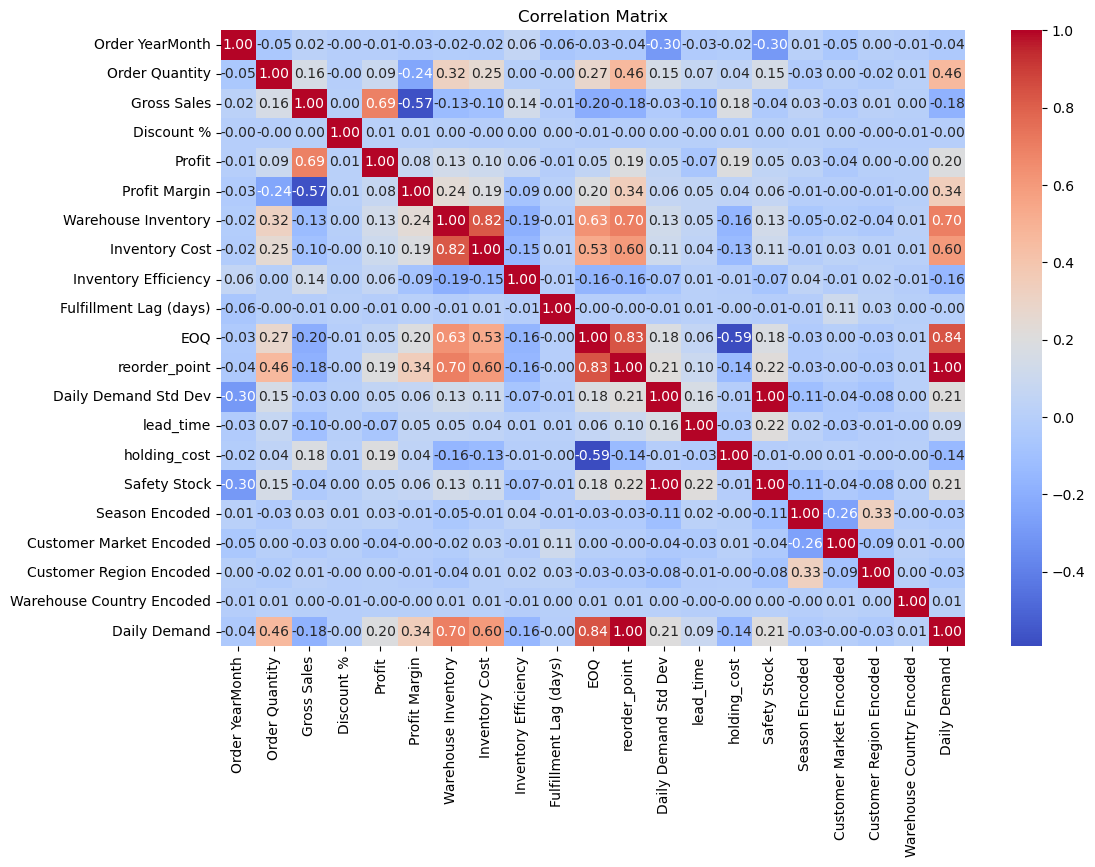

In [270]:
cols_to_check = [
    'Order YearMonth', 'Order Quantity', 'Gross Sales', 'Discount %', 'Profit', 'Profit Margin',
    'Warehouse Inventory', 'Inventory Cost', 'Inventory Efficiency',
    'Fulfillment Lag (days)', 'EOQ', 'reorder_point', 'Daily Demand Std Dev', 
    'lead_time', 'holding_cost', 'Safety Stock', 'Season Encoded','Customer Market Encoded', 'Customer Region Encoded', 'Warehouse Country Encoded', 'Daily Demand'
    ]

correlation_matrix = df[cols_to_check].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Use a multi-output regressor (advanced) to predict both targets at once.

Or build one model and derive the other (e.g., predict EOQ, then calculate reorder point based on predicted daily demand and lead time).

In [271]:
cols_to_drop = ['Demand Std Dev_y', 'Weekly Demand Std Dev', 'Reorder Point_y', 'Demand Std Dev_x', 'EOQ_y']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols, inplace=True)

In [272]:
df.isnull().sum()

Order ID                        0
Order Item ID                   0
Order YearMonth                 0
Order Day                       0
Order Time                      0
Order Quantity                  0
Product Department              0
Product Category                0
Product Name                    0
Customer ID                     0
Customer Market                 0
Customer Region                 0
Customer Country                0
Warehouse Country               0
Shipment Day                    0
Shipment Mode                   0
Shipment Days - Scheduled       0
Gross Sales                     0
Discount %                   1749
Profit                          0
Date                            0
date                            0
Year Month                      0
Warehouse Inventory             0
Inventory Cost Per Unit         0
Stockout                        0
Inventory Value                 0
Profit Margin                   0
Inventory Cost                  0
Inventory Effi

In [273]:
df['Discount %'].fillna(df['Discount %'].mean(), inplace=True)

In [274]:
# Save data for models
df.to_csv('Model_data', index=False)

In [275]:
df.isnull().sum()

Order ID                     0
Order Item ID                0
Order YearMonth              0
Order Day                    0
Order Time                   0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
Date                         0
date                         0
Year Month                   0
Warehouse Inventory          0
Inventory Cost Per Unit      0
Stockout                     0
Inventory Value              0
Profit Margin                0
Inventory Cost               0
Inventory Efficiency         0
Fulfillment Lag (days)       0
Daily Demand                 0
Estimate